In [69]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#### Carga de Dataset

In [38]:
## Carga del dataset
# Cargar datos desde un archivo CSV
df_ruta = '../examen_datascience_fundamentals/data/hotel_bookings.csv' #definir la ruta del archivo

df = pd.read_csv(df_ruta) #transformar csv a dataframe

print('Tamanho de dataset original:', df.shape)
print('Informacion acerce del dataset')
print(df.info())
print('Estadistica descriptiva del dataset')
print(df.describe())
df.head()


Tamanho de dataset original: (119390, 32)
Informacion acerce del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babie

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#### Detección y eliminación de valores duplicados

In [39]:
##Verificacion de elementos duplicados
print("Cantidad de filas duplicadas antes de la eliminacion: ",df.duplicated().sum())
##Se observan un total de 31994 elementos duplicados, considerando que esto son bookings y queremos analizar la satisfaccion del cliente se procede a eliminar los datos duplicados
df.drop_duplicates(inplace = True) ## eliminacion de filas duplicadas en filas con afectacion directa al dataframe

##Verificacion de elementos duplicados luego de la eliminacion
print("Cantidad de filas duplicadas luego de la eliminacion: ",df.duplicated().sum())
##Verificacion del tamanho del dataset luego de la eliminacion
print('nTamanho del dataset luego de la limpieza de duplicados',df.shape)

Cantidad de filas duplicadas antes de la eliminacion:  31994
Cantidad de filas duplicadas luego de la eliminacion:  0
nTamanho del dataset luego de la limpieza de duplicados (87396, 32)


#### Verificación y ajuste de tipos de datos

In [40]:
##Verificacion y ajustes de tipos de datos
print("Dtype Original")
print(df.dtypes)

#Usando Dic para modificar el tipo de datos. Sacado de sitio web https://www.geeksforgeeks.org/change-data-type-for-one-or-more-columns-in-pandas-dataframe/
convert_dict = {'hotel': str,
                'is_canceled': int, 
                'lead_time': int, 
                'arrival_date_year': int,
                'arrival_date_month': str, 
                'arrival_date_week_number': int,
                'arrival_date_day_of_month': int,
                'stays_in_weekend_nights': int, 
                'stays_in_week_nights': int, 
                'adults': int, 
                'children': float, 
                'babies': int, 
                'meal': str, 
                'country': str,
                'market_segment': str,
                'distribution_channel': str,
                'is_repeated_guest': int,
                'previous_cancellations': int,
                'previous_bookings_not_canceled': int,
                'reserved_room_type': str,
                'assigned_room_type': str,
                'booking_changes': int,
                'deposit_type': str,
                'agent': float,
                'company': float,
                'days_in_waiting_list': int,
                'customer_type': str,
                'adr': float,
                'required_car_parking_spaces': int,
                'total_of_special_requests': int,
                'reservation_status': str,
                
                }
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df = df.astype(convert_dict)
## Siguen siendo object ya que pandas considera str como objeto, pero esto ya fue aplicado para asegurar el tipo
print("Dtype Modificado")
print(df.dtypes)


Dtype Original
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent              

#### Consistencia en valores categóricos

In [41]:
def contar_valores_categoricos(df):
    # Recorre las columnas categóricas del DataFrame
    for col in df.select_dtypes(include=['object', 'category']):
        print(f'Valores únicos en la columna: {col}')
        print(df[col].value_counts())
        print('-' * 50)

contar_valores_categoricos(df)
### No se observan datos categoricos a los cuales se tengan que modificar por ser inconsistentes como City Hotel y Citi Hotel, por lo que se procede a ponerlos todos en mayuscula

##Se cambiar str to upper y strip utilizando metodo apply.
df.apply(lambda x: x.astype(str).str.upper().str.strip())


Valores únicos en la columna: hotel
hotel
City Hotel      53428
Resort Hotel    33968
Name: count, dtype: int64
--------------------------------------------------
Valores únicos en la columna: arrival_date_month
arrival_date_month
August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: count, dtype: int64
--------------------------------------------------
Valores únicos en la columna: meal
meal
BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: count, dtype: int64
--------------------------------------------------
Valores únicos en la columna: country
country
PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 178, dtype: int64
------------------------

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,RESORT HOTEL,0,342,2015,JULY,27,1,0,0,2,...,NO DEPOSIT,NAN,NAN,0,TRANSIENT,0.0,0,0,CHECK-OUT,2015-07-01
1,RESORT HOTEL,0,737,2015,JULY,27,1,0,0,2,...,NO DEPOSIT,NAN,NAN,0,TRANSIENT,0.0,0,0,CHECK-OUT,2015-07-01
2,RESORT HOTEL,0,7,2015,JULY,27,1,0,1,1,...,NO DEPOSIT,NAN,NAN,0,TRANSIENT,75.0,0,0,CHECK-OUT,2015-07-02
3,RESORT HOTEL,0,13,2015,JULY,27,1,0,1,1,...,NO DEPOSIT,304.0,NAN,0,TRANSIENT,75.0,0,0,CHECK-OUT,2015-07-02
4,RESORT HOTEL,0,14,2015,JULY,27,1,0,2,2,...,NO DEPOSIT,240.0,NAN,0,TRANSIENT,98.0,0,1,CHECK-OUT,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,CITY HOTEL,0,23,2017,AUGUST,35,30,2,5,2,...,NO DEPOSIT,394.0,NAN,0,TRANSIENT,96.14,0,0,CHECK-OUT,2017-09-06
119386,CITY HOTEL,0,102,2017,AUGUST,35,31,2,5,3,...,NO DEPOSIT,9.0,NAN,0,TRANSIENT,225.43,0,2,CHECK-OUT,2017-09-07
119387,CITY HOTEL,0,34,2017,AUGUST,35,31,2,5,2,...,NO DEPOSIT,9.0,NAN,0,TRANSIENT,157.71,0,4,CHECK-OUT,2017-09-07
119388,CITY HOTEL,0,109,2017,AUGUST,35,31,2,5,2,...,NO DEPOSIT,89.0,NAN,0,TRANSIENT,104.4,0,0,CHECK-OUT,2017-09-07


#### Manejo de valores faltantes

In [42]:
# Identificar valores faltantes
def identificar_valores_faltantes(df):
    print("Valores faltantes en el dataset")
    qsna = df.shape[0] - df.isnull().sum(axis=0)
    qna = df.isnull().sum(axis=0)
    ppna = round(100 * (df.isnull().sum(axis=0) / df.shape[0]), 2)
    
    # Crear DataFrame con los resultados
    aux = {'datos sin NAs en q': qsna, 'Na en q': qna, 'Na en %': ppna}
    na_df = pd.DataFrame(data=aux)
    
    # Ordenar el DataFrame por el porcentaje de valores faltantes
    return na_df.sort_values(by='Na en %', ascending=False)

# Rellenar valores faltantes
def rellenar_valores_faltantes(df):
    for column in df.columns:
        if df[column].isnull().sum() > 0:  # Procesar solo columnas con valores faltantes
            if df[column].dtype == 'object':  # Si la columna es de tipo texto
                df[column].fillna('Desconocido', inplace=True)  # Rellenar con 'Desconocido'
            elif df[column].dtype in ['int64', 'float64']:  # Si la columna es numérica
                moda = df[column].mode()[0]  # Obtener la moda (valor más frecuente)
                df[column].fillna(moda, inplace=True)  # Rellenar con la moda
    return df

# Identificar valores faltantes
print("Valores faltantes en el dataset antes de la limpieza")
na_df = identificar_valores_faltantes(df)
print(na_df)

##Se pueden observar algunos valores nulos en las columnas company, agent,children estos valores segun se puede ver en la explicacion del kaggle es que son
# datos categoricos con IDs para company y agent ya que los datos fueron anonimizados por lo que se modifica con los id que mas se repiten (moda) 
# y children la gran mayoria de valor 0 por lo que tampoco afectarian aplicar la moda.

# Rellenar valores faltantes
df = rellenar_valores_faltantes(df)
print(df.head())

## Verificar valores luego de la modificacion
print("Valores faltantes en el dataset despues de la limpieza")
na_df = identificar_valores_faltantes(df)
print(na_df)

Valores faltantes en el dataset antes de la limpieza
Valores faltantes en el dataset
                                datos sin NAs en q  Na en q  Na en %
company                                       5259    82137    93.98
agent                                        75203    12193    13.95
hotel                                        87396        0     0.00
is_canceled                                  87396        0     0.00
reservation_status                           87396        0     0.00
total_of_special_requests                    87396        0     0.00
required_car_parking_spaces                  87396        0     0.00
adr                                          87396        0     0.00
customer_type                                87396        0     0.00
days_in_waiting_list                         87396        0     0.00
deposit_type                                 87396        0     0.00
booking_changes                              87396        0     0.00
assigned_room_type

C:\Users\ENRIF\AppData\Local\Temp\ipykernel_23992\3076743820.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(moda, inplace=True)  # Rellenar con la moda


                                datos sin NAs en q  Na en q  Na en %
hotel                                        87396        0      0.0
is_canceled                                  87396        0      0.0
reservation_status                           87396        0      0.0
total_of_special_requests                    87396        0      0.0
required_car_parking_spaces                  87396        0      0.0
adr                                          87396        0      0.0
customer_type                                87396        0      0.0
days_in_waiting_list                         87396        0      0.0
company                                      87396        0      0.0
agent                                        87396        0      0.0
deposit_type                                 87396        0      0.0
booking_changes                              87396        0      0.0
assigned_room_type                           87396        0      0.0
reserved_room_type                

#### Detección de datos anómalos

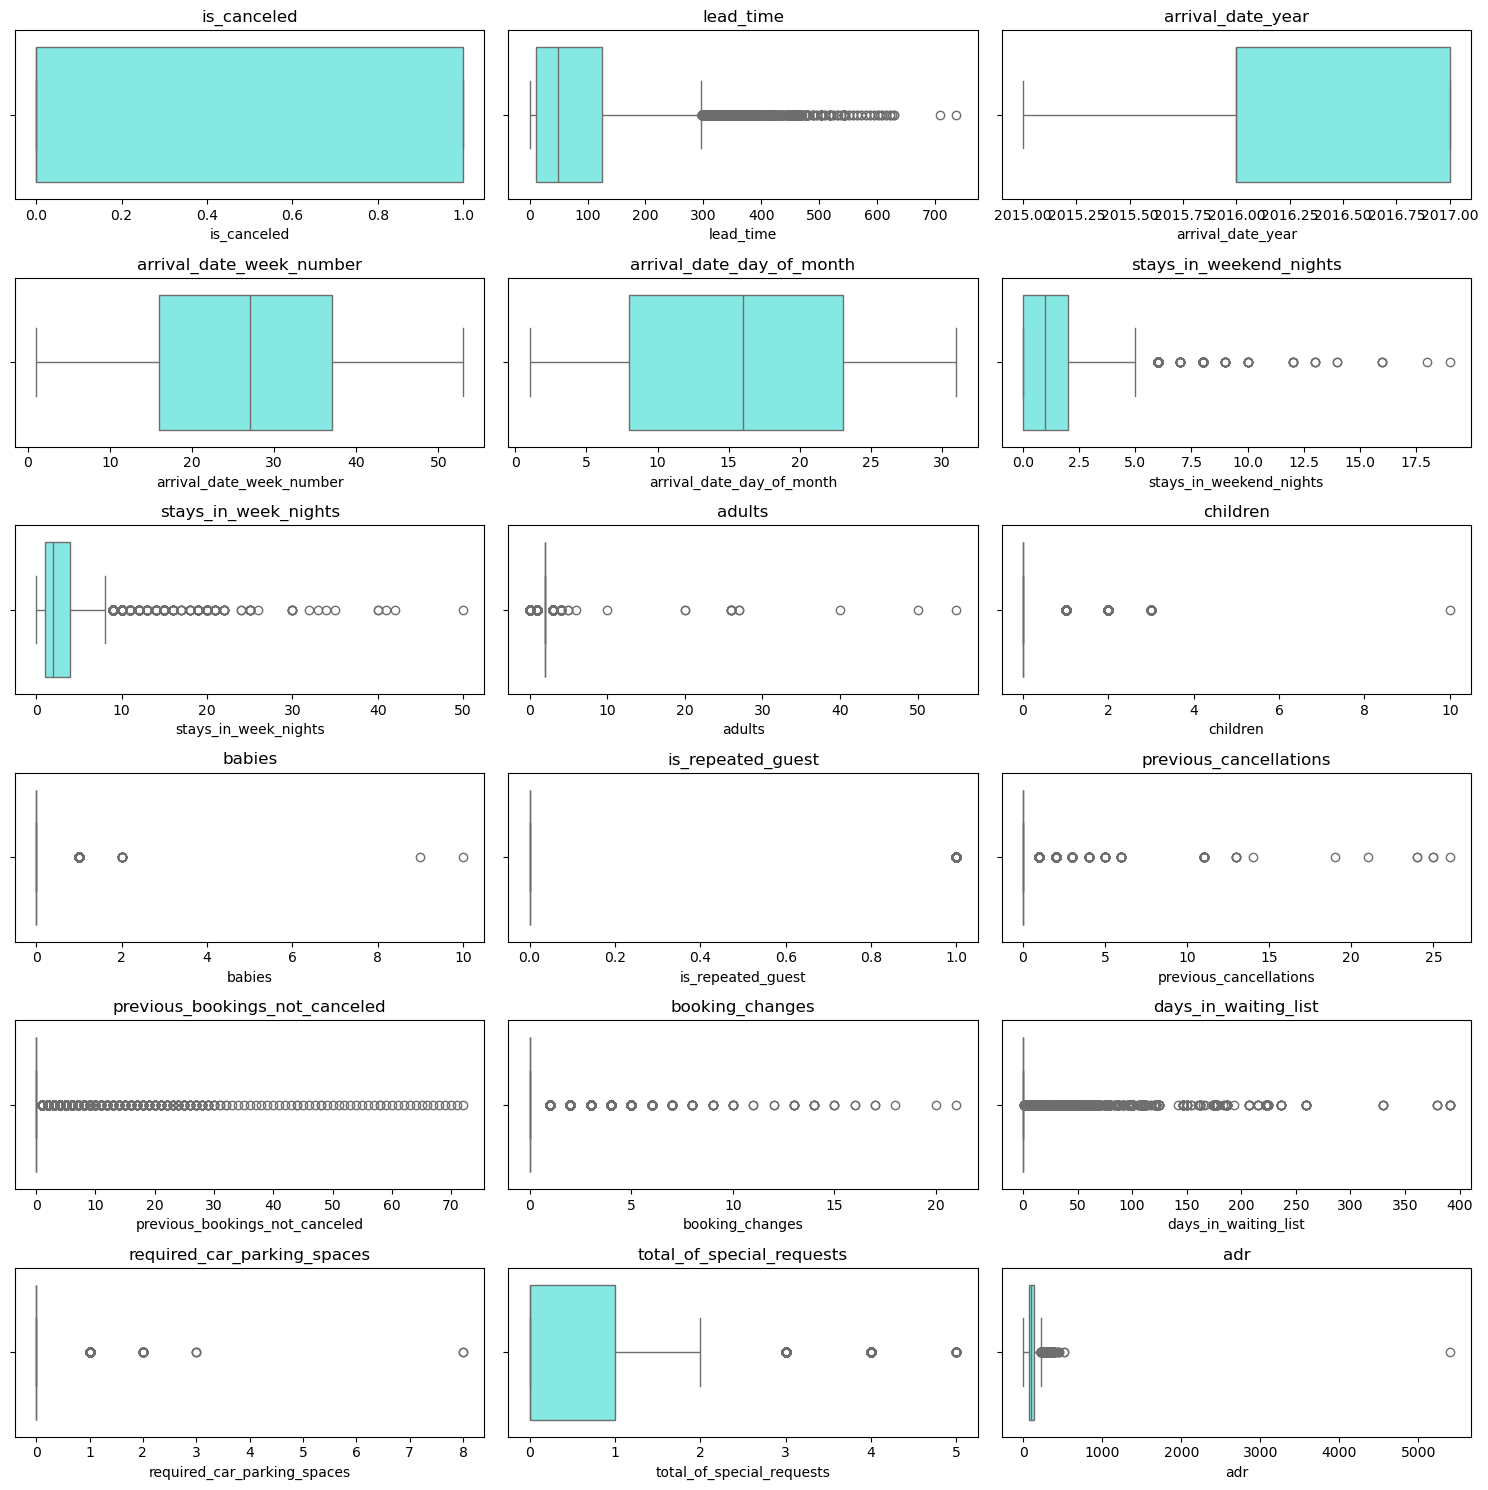

In [43]:
##
## Ploteado de datos anomalos para verificacion de outliers
## Considerando las columnas numericas se verifican las columnas mas representativas las cuales serviran para modificar los outliers, no asi los datos categoricos
#esto de acuerdo a lo que se pudo ver en este codigo de kaggle: https://www.kaggle.com/code/peimandaii/recommend-hotel-ml-eda 

features = ['is_canceled','lead_time','arrival_date_year','arrival_date_week_number',
            'arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights',
            'adults','children','babies','is_repeated_guest',
            'previous_cancellations','previous_bookings_not_canceled','booking_changes',
            'days_in_waiting_list','required_car_parking_spaces','total_of_special_requests','adr']

def plot_grafico_outliers(features, df):
    
    fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 15))

    for i, feature in enumerate(features):
        row, col = divmod(i, 3)  
        sns.boxplot(x=df[feature], ax=axes[row, col], color="#75f8f2")
        axes[row, col].set_title(feature)

    plt.tight_layout()
    plt.show()
plot_grafico_outliers(features,df)

#### Observaciones del grafico
##### Lo que se pueden observar en este grafico de boxplot es que existen muchos variables con valores atipicos, los cuales sugieren la existencia de casos muy inusuales o excepcionales los cuales seran modificados para un mejor analisis de estos datos.

In [44]:
##Deteccion de datos anomalos con verificacion IQR para deteccion de datos outliers
### Deteccion de outliers de acuerdo a articulo: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

## Se tienen en cuenta solo los features relevantes, los cuales seran modificados de acuerdo a la media 
def modificar_outliers_iqr(df, features):
    # Crear una copia del DataFrame original
    df_modificado = df.copy()##Creacion de copia del dataframe para realizar la modificacion sin afectar el dataframe 
    
    for col in features:
        # Calcular el primer y tercer cuartil
        Q1 = df_modificado[col].quantile(0.25)  # Primer cuartil
        Q3 = df_modificado[col].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1  # Rango intercuartil

        # Límites inferior y superior para considerar outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificar índices de outliers
        outlier_indices = df_modificado[(df_modificado[col] < lower_bound) | (df_modificado[col] > upper_bound)].index
        
        # Calcular la media de la columna
        mean_value = df_modificado[col].mean()
        
        # Reemplazar outliers con la media convertida a tipo compatible
        df_modificado.loc[outlier_indices, col] = mean_value.astype(df_modificado[col].dtype)
    
    
    return df_modificado

# Aplicacion del detector
outliers_detectados = modificar_outliers_iqr(df, features)

outliers_detectados ## imprime dataset modificado


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,79,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,79,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,40.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,40.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,40.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,40.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,1,...,No Deposit,9.0,40.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,40.0,0,Transient,157.71,0,0,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,40.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


#### Visualizaciones exploratorias univariadas

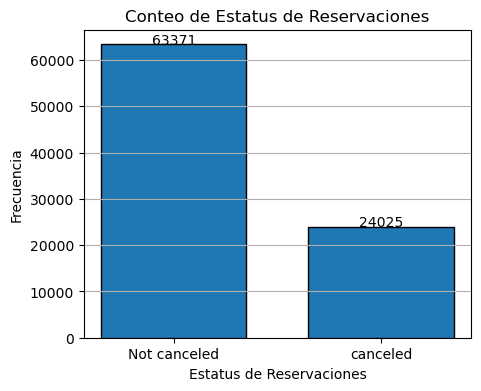

In [48]:
### Bar ploting del numero de estatus de reservacion (no cancelado, cancelado)
plt.figure(figsize = (5,4)) ##plotear grafico

conteo = df['is_canceled'].value_counts()##Conteo de valores
values = list(conteo.values) #obtencion de valores

plt.title('Conteo de Estatus de Reservaciones')
plt.bar(['Not canceled','canceled'],df['is_canceled'].value_counts(), edgecolor = 'k',width = 0.7)##plotear grafico con los labels correspondientes
for i in range(len(conteo.index)):##recorrer los indices
    plt.text(i, values[i] + 0.5, str(values[i]), ha='center')### Anota el valor en cada barra, un poco por encima.
plt.xlabel('Estatus de Reservaciones') #añadir nombre al eje x
plt.ylabel('Frecuencia') #añadir nombre al eje y
plt.grid(axis='y') #agregar una cuadricula para facilitar la lectura de los valores
plt.show()



##### Se puede ver en el siguiente grafico que de acuerdo al conteo de estatus de reservaciones existe un elevado numero de reservaciones no canceladas con un total de 633371 seguido del estatus cancelado con 24025 cancelados

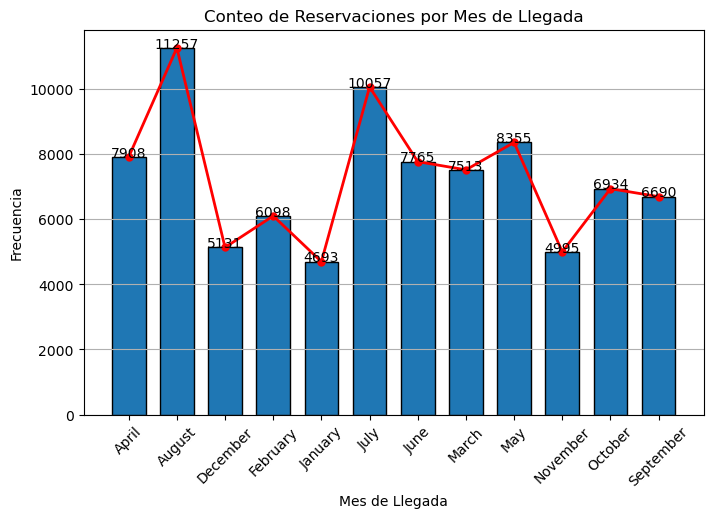

In [51]:
# Ploteo de arrival_date_month
plt.figure(figsize=(8, 5))  # Establecer el tamaño del gráfico

# Contar los valores de arrival_date_month
conteo = df['arrival_date_month'].value_counts().sort_index()  # Contar los meses en orden
values = list(conteo.values)  # Obtención de valores

plt.title('Conteo de Reservaciones por Mes de Llegada')
plt.bar(conteo.index, values, edgecolor='k', width=0.7)  # Plotea el gráfico con los labels correspondientes

# Anotar los valores en las barras
for i in range(len(conteo.index)):  # Recorre los índices
    plt.text(i, values[i] + 0.5, str(values[i]), ha='center')  # Anota el valor encima de cada barra

# Se agrega una línea por encima de las barras
plt.plot(range(len(conteo.index)), values, color='red', marker='o', linewidth=2, markersize=5)  # Línea roja sobre las barras

plt.xlabel('Mes de Llegada')  # Añadir nombre al eje x
plt.ylabel('Frecuencia')  # Añadir nombre al eje y
plt.grid(axis='y')  # Agregar una cuadrícula para facilitar la lectura de los valores
plt.xticks(rotation=45)  # Rotar los nombres de los meses para mejor legibilidad
plt.show()  # Mostrar el gráfico

##### En este grafico se puede observar la ocurrencia de llegada de huespedes en los hoteles de acuerdo al mes, se ve los meses de mas demanda son de Agosto y julio con 11257  y 10057 respectivamente. Ademas, se observa que los meses de abril, junio, marzo, mayo, octubre y setiembre estan distribuidos uniformemente con al rededor de 8000 valores y los meses de diciembre, febrero y enero y noviembre con una baja considerable de entre 4000 a 6000 huespedes.

#### Visualizaciones exploratorias multivariadas

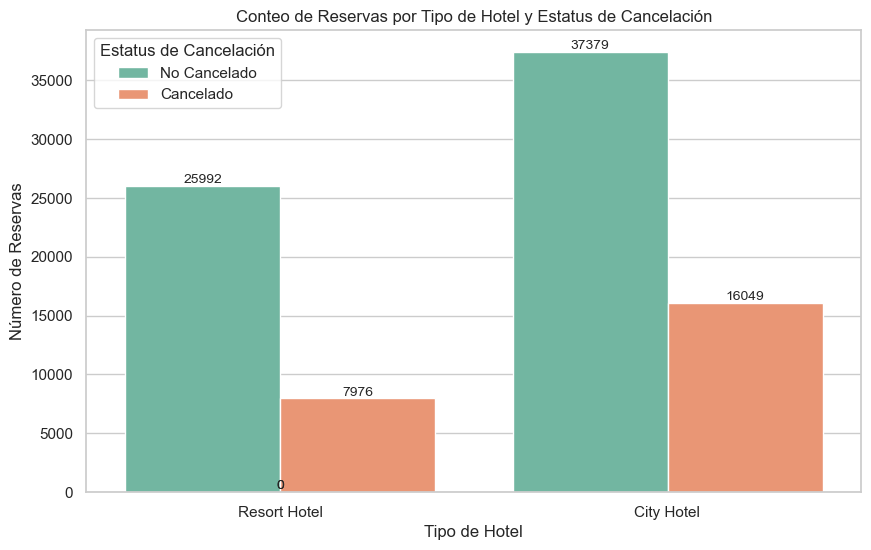

In [59]:
### Grafico multivariado 1

# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Establecer el tamaño del gráfico
barplot = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Set2')

# Títulos y etiquetas
plt.title('Conteo de Reservas por Tipo de Hotel y Estatus de Cancelación')
plt.xlabel('Tipo de Hotel')  # Etiqueta del eje X
plt.ylabel('Número de Reservas')  # Etiqueta del eje Y
plt.legend(title='Estatus de Cancelación', labels=['No Cancelado', 'Cancelado'])

# Calcular el conteo de observaciones en cada barra y anotarlas
for p in barplot.patches:
    # Obtener la altura de cada barra
    height = p.get_height()
    # Anotar el conteo sobre cada barra
    barplot.annotate(f'{int(height)}',(p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.show()



##### Se puede observa en este grafico que en el numero de reservas por tipo de hotel, los hoteles de ciudad tienen un numero mayor de reservaciones las cuales se distribuyen en no canceladas con 37379 y canceladas 16049. Para el caso de los resorts, se ve una disminucion de reservaciones por lo que podemos notar que el numero de reservas no canceladas es 25992 y canceladas 7976. Esto podria deberse a que existe una mayor cantidad de hoteles en ciudad en comparacion a los resorts.  

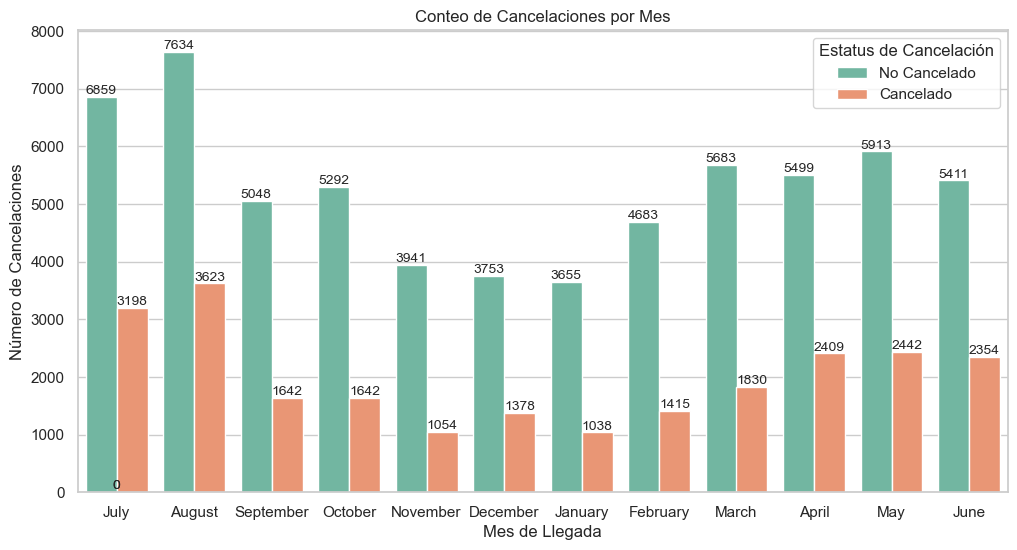

In [60]:
### Grafico multivariado 2
# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))  # Establecer el tamaño del gráfico
barplot = sns.countplot(x='arrival_date_month', hue='is_canceled', data=df, palette='Set2')

# Títulos y etiquetas
plt.title('Conteo de Cancelaciones por Mes')
plt.xlabel('Mes de Llegada')  # Etiqueta del eje X
plt.ylabel('Número de Cancelaciones')  # Etiqueta del eje Y
plt.legend(title='Estatus de Cancelación', labels=['No Cancelado', 'Cancelado'])

# Calcular el conteo de observaciones en cada barra y anotarlas
for p in barplot.patches:
    # Obtener la altura de cada barra
    height = p.get_height()
    # Anotar el conteo sobre cada barra
    barplot.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.show()


##### En este grafico se puede observar que en todos los meses se presenta una alta tasa de "no cancelaciones" sobre las "cancelaciones". Se observan que los picos de no cancelacion se encuentran en Julio y Agosto y el menor numero entre Noviembre, Diciembre y Enero donde hay una menor cantidad de huespedes. Para el caso de las cancelaciones tambien se observa algo similar a las no cancelaciones, los meses de mas cancelacion son Julio y Agosto, mientras que los meses de Noviembre, Diciembe y Enero son mas bajas; sin embargo, se observa tambien que hay una lijera subida de cancelaciones en Diciembre.

#### Estadísticas descriptivas

In [66]:
#Debido al gran numero de columnas, me centro en el que es la columna que mas utilice para este analisis is_canceled.

resumen = df['is_canceled'].describe()

IQR = resumen.loc['75%'] - resumen.loc['25%'] #calculo del IQR. Esta métrica nos indica que tan disperso estan los valores de la mediana.
print("Resumen estadístico general de las cancelaciones:")
print(resumen) #imprimir resumen

print("\nRango Intercuartílico (IQR) de is_canceled:") #imprimir el IQR
print(IQR)



Resumen estadístico general de las cancelaciones:
count    87396.000000
mean         0.274898
std          0.446466
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_canceled, dtype: float64

Rango Intercuartílico (IQR) de is_canceled:
1.0


##### Se observa que tenemos una cantidad de 87396 datos de esta columna, los cuales tienen una media de 27%, con una desviacion estandar de 0,45 lo cual refleja que hay una variabilidad, donde vimos que predomina el "no cancelado". Finalmente, se presenta con un rango intercuartilico (IQR) de 1,0, lo cual es esperado para una variable binario como esta.

### Identificación de tendencias

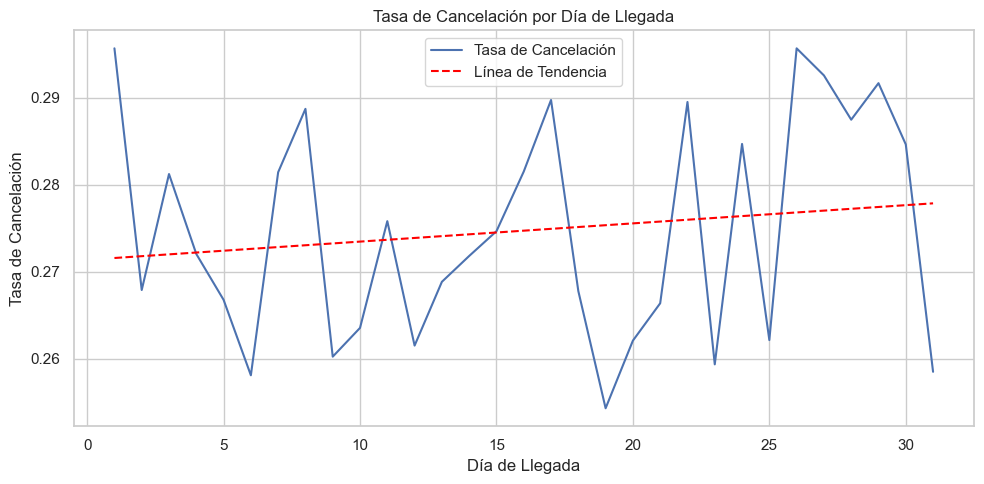

In [73]:
#### Ploteo de arrival_date_day_of_month 
### De acuerdo a lo observado en codigo Kaggle: https://www.kaggle.com/code/syxotica/hotel-booking-eda
def plot_cancellation_rate_over_time(df, date_column, cancel_column):
    # Agrupa por la fecha para calcular la tasa de cancelación
    cancellation_rate_by_date = df.groupby(date_column)[cancel_column].mean()

    # Crea el gráfico
    plt.figure(figsize=(10, 5))#
    sns.lineplot(x=cancellation_rate_by_date.index, y=cancellation_rate_by_date.values, label='Tasa de Cancelación')## ploteado de lineplot 

    # Crea un array con valores consecutivos que representan el índice de los puntos en el gráfico
    trend_x = np.arange(len(cancellation_rate_by_date))

    # Calcula los coeficientes de una línea de tendencia (regresión lineal) de grado 1 utilizando los valores de cancelación.
    trend_y = np.poly1d(np.polyfit(trend_x, cancellation_rate_by_date.values, 1))(trend_x)

    # Dibuja la línea de tendencia en el gráfico usando los índices del gráfico en el eje x y los valores ajustados (línea de tendencia) en el eje y.
    # La línea es roja y con guiones ('--').
    plt.plot(cancellation_rate_by_date.index, trend_y, color='red', linestyle='--', label='Línea de Tendencia')

    # Etiquetas y formato
    plt.title('Tasa de Cancelación por Día de Llegada')
    plt.xlabel('Día de Llegada')
    plt.ylabel('Tasa de Cancelación')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Usar la función
plot_cancellation_rate_over_time(df, 'arrival_date_day_of_month', 'is_canceled')

#### En este grafico se puede observar la tasa de cancelacion frente al dia de llegada para cada dia del mes. La linea azul representa la tasa de cancelacion, mientras que la linea roja entre cortada la tendencia de acuerdo al resultado del calculo de regresion lineal. Se puede observar que la tasa de cancelacion fluctua bastante entre los dias del mes. Sin embargo, basandonos en el resultado del calculo de regresion linal, podemos ver que hay una tendencia positiva hacia final de mes. Finalmente, podemos observar que los picos de cancelacion se encuentran entre el 1 y 26 del mes, mientras que las caidas se encuentran entre el 6 y 16 de cada mes.